<center>![Image](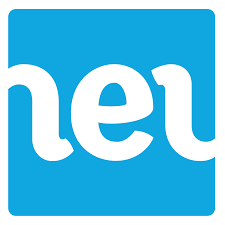 "icon")</center>
<center><h1> Treinamento de Novos Piratas</h1>
<hr />
<h3> Primeira entrega Data Science </h3></center>
<p>Responder quatro perguntas relacionadas ao conteúdo apresentado em 18/05 na primeira parte do Treinamento de Novos Piratas - Data Science, dado pelo Núcleo de Empreendedorismo da USP (NEU). Os conteúdos foram Data101, Web Scraping e Visualização de Dados.</p>

<p><ul> Utilizados:
<li>Base de dados teste disponibilizado pelo Walmart (base Kaggle);</li>
<li>Jupyter Notebook;</li>
<li>Python 3;</li>
<li>Bibliotecas de Análise de Dados;</li>
<li>Referências dadas em aula;</li>
</ul></p>

In [711]:
#importação das bibliotecas

import pandas as pd
import numpy as np
from datetime import *
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import *
%matplotlib inline

In [712]:
#importação do arquivo

file_name = "train.csv"
df = pd.read_csv(file_name)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


<h3>Exercício 1:</h3>**Plote o gráfico do desempenho médio semanal (média de todas as lojas) ao longo do período catalogado. Qual é o melhor tipo de gráfico para expor essa informação? Por quê?**

<p>O gráfico escolhido para representar essa informação foi o gráfico de linhas. Utilizando [esta](https://journalismcourses.org/courses/DE0618/Visual-vocabulary.pdf) referência, vemos que a melhor forma de representar mudanças ao longo de um tempo é com o auxílio do gráfico de linhas pois eles conseguem representar muito bem a mudança ao longo do tempo. No nosso caso, queremos representar como as vendas médias por semana andam ao longo das semanas, no período catalogado.</p>

<p>No gráfico abaixo, vendas por semana, vemos como as lojas se comportaram com relação as vendas por semana, ao longo de 142 semanas.</p>

In [713]:
#ordenação da base de dados por número de Loja

orderByStore = df.sort_values(by='Store')
orderByStore

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
167936,1,25,2012-05-18,10029.04,False,70.33,3.630,6154.14,NaN,45.11,1675.49,5508.18,221.742674,7.143,A,151315
253047,1,82,2011-05-06,21181.28,False,64.61,3.906,NaN,NaN,NaN,NaN,NaN,215.796004,7.682,A,151315
42987,1,96,2011-12-09,30613.91,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,A,151315
276573,1,8,2011-01-21,34547.40,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
236242,1,71,2010-10-08,2577.78,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
216040,1,80,2012-06-01,19270.99,False,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,A,151315
184388,1,55,2011-05-20,9191.43,False,67.63,3.907,NaN,NaN,NaN,NaN,NaN,215.733920,7.682,A,151315
8672,1,26,2011-11-04,9017.92,False,54.98,3.332,NaN,NaN,NaN,NaN,NaN,217.837382,7.866,A,151315
8673,1,36,2010-11-26,2295.00,True,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,A,151315
43016,1,45,2010-05-28,12.50,False,80.44,2.759,NaN,NaN,NaN,NaN,NaN,210.896761,7.808,A,151315


In [714]:
#calculo de vendas médias por semana, utilizando as vendas de todas as lojas

week = []
total = []

nowDate = orderByStore['Date'].min()
i = 1

while (nowDate < orderByStore['Date'].max()):
    values = orderByStore[orderByStore['Date'] == nowDate] #separa a base de dados por dia
    median = (values['Weekly_Sales']).mean() #média = valores na semana/loja
    total.append(median)
    week.append(i)
    
    i = i + 1
    nowDate = nowDate + timedelta(days=7) #incrementa a semana

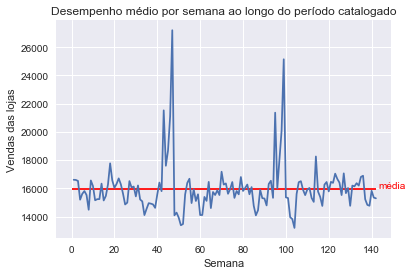

In [728]:
#plota o resultado

result = pd.DataFrame(total,week)
result['week'] = week
result
plt.plot(result['week'], result[0])

plt.hlines(y=statistics.mean(orderByStore['Weekly_Sales']), xmin=0, xmax=142, color='red')
plt.text(x = 143 , y = statistics.mean(orderByStore['Weekly_Sales']), s = 'média', size = 10, color='red')
plt.title('Desempenho médio por semana ao longo do período catalogado')
plt.xlabel('Semana')
plt.ylabel('Vendas das lojas')

<h3>Exercicio 2:</h3>** Encontre o conjunto de 10 lojas que melhor perfomaram. Plote o gráfico de desempenho médio dessas lojas no período disponível.**

<p>Utilizando os gráficos do tipo Lollipop Chart e de barras, e uma base de dados ordenados, conseguimos observar as lojas que melhor performaram dentro do período dado. </p>

In [716]:
#gráfico para mostrar a venda média de cada loja dentro do período dado

store = []
mean = []
maxStore = orderByStore['Store'].max()
minStore = orderByStore['Store'].min()

for i in range (1, maxStore + 1):
    store.append(i)
    storeMatrix = orderByStore[orderByStore['Store'] == i]
    meanWeeklySales = (storeMatrix['Weekly_Sales']).mean() #média = Soma total da vendas/período dado
    mean.append(meanWeeklySales)

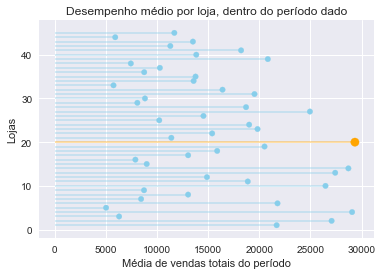

In [717]:
df = pd.DataFrame(mean,store)
my_color = np.where(df[0] == max(mean), 'orange', 'skyblue')
my_size = np.where(df[0] == max(mean), 70, 30)

plt.hlines(y=store, xmin=0, xmax = mean, color=my_color, alpha=0.4)
plt.scatter(mean, store, color=my_color, s=my_size, alpha=1)
plt.title('Desempenho médio por loja, dentro do período dado')
plt.xlabel('Média de vendas totais do período')
plt.ylabel('Lojas')

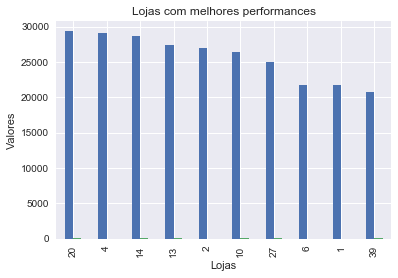

In [718]:
#loja com melhores performaces

df2 = pd.DataFrame(mean,store)
df2['id'] = store
betterPerformance = df2.sort_values(by=0, ascending=False).head(10)

betterPerformance.plot.bar(legend=None)
plt.title('Lojas com melhores performances')
plt.xlabel('Lojas')
plt.ylabel('Valores')

<h3>Exercicio 3:</h3>** Encontre o conjunto de 10 lojas que pior perfomaram. Plote o gráfico de desempenho médio dessas lojas no período disponível.**

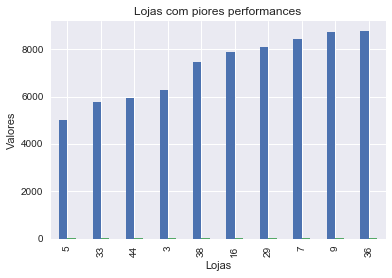

In [719]:
worstPerformance = df2.sort_values(by=0).head(10)

worstPerformance.plot.bar(legend=None)
plt.title('Lojas com piores performances')
plt.xlabel('Lojas')
plt.ylabel('Valores')

<h3>Exercício 4:</h3>**Dê o faturamento médio e mediano das lojas em semanas sem feriados. Faça o mesmo para as semanas com feriados.  Plote gráficos do desempenho médio com e sem feriados ao longo do período.
Feriados impactam negativa ou positivamente as vendas?**

Pode-se notar, pelos gráficos obtidos abaixo, que os feriados afetam positivamente as vendas. Comparando com a média geral, do primeiro exercício que leva em consideração todas as datas, sendo feriado ou não, as datas que são consideradas como feriados obtem uma média de venda maior do que as datas que não são consideradas como feriados.

In [731]:
#dados levando em consideração apenas semanas com feriados

weekHolidays = []
totalHolidays = []
sales = []

holidays = orderByStore[orderByStore['IsHoliday'] == True]
nowDate = holidays['Date'].min()
i = 1

while (nowDate < holidays['Date'].max()):
    values = holidays[holidays['Date'] == nowDate] #separa a base de dados por dia
    media = (values['Weekly_Sales']).mean()
    soma = (values['Weekly_Sales']).sum()
    if(soma != 0):
        sales.append(soma)
    totalHolidays.append(media)
    weekHolidays.append(i)
    
    i = i + 1
    nowDate = nowDate + timedelta(days=7) #incrementa a semana

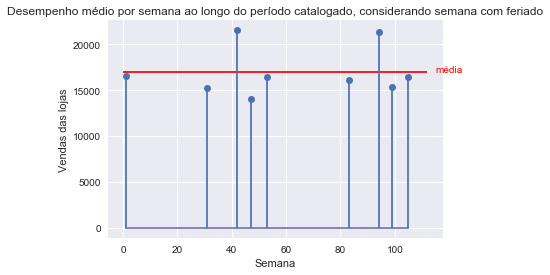

In [732]:
result = pd.DataFrame(totalHolidays,weekHolidays)
result['week'] = weekHolidays
resultWithoutNaN = result.dropna()

plt.stem(resultWithoutNaN['week'], resultWithoutNaN[0])

plt.hlines(y=statistics.mean(holidays['Weekly_Sales']), xmin=0, xmax=112, color='red')
plt.text(x = 115 , y = statistics.mean(holidays['Weekly_Sales']), s = 'média', size = 10, color='red')
plt.title('Desempenho médio por semana ao longo do período catalogado, considerando semana com feriado')
plt.xlabel('Semana')
plt.ylabel('Vendas das lojas')


In [733]:
#média das vendas

statistics.mean(holidays['Weekly_Sales'])

16986.673621777081

In [734]:
#mediana das vendas do período

statistics.median(holidays['Weekly_Sales'])

8031.79

In [735]:
#dados levando em consideração apenas semanas sem feriados

weekWithoutHolidays = []
totalWithoutHolidays = []
sales = []

withoutHolidays = orderByStore[orderByStore['IsHoliday'] == False]
nowDate = withoutHolidays['Date'].min()
i = 1

while (nowDate < withoutHolidays['Date'].max()):
    values = withoutHolidays[withoutHolidays['Date'] == nowDate] #separa a base de dados por dia
    media = (values['Weekly_Sales']).mean()
    soma = (values['Weekly_Sales']).sum()
    if(soma != 0):
        sales.append(soma)
    totalWithoutHolidays.append(media)
    weekWithoutHolidays.append(i)
    
    i = i + 1
    nowDate = nowDate + timedelta(days=7) #incrementa a semana

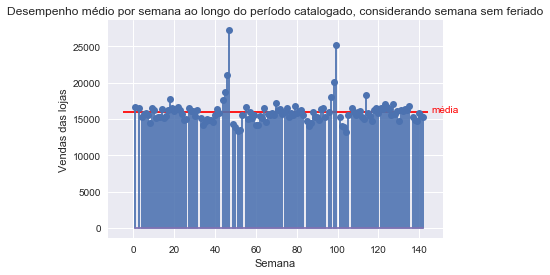

In [736]:
result = pd.DataFrame(totalWithoutHolidays,weekWithoutHolidays)
result['week'] = weekWithoutHolidays
resultWithoutNaN = result.dropna()

plt.stem(resultWithoutNaN['week'], resultWithoutNaN[0])

plt.hlines(y=statistics.mean(withoutHolidays['Weekly_Sales']), xmin=-5, xmax=144, color='red')
plt.text(x = 146 , y = statistics.mean(withoutHolidays['Weekly_Sales']), s = 'média', size = 10, color='red')
plt.title('Desempenho médio por semana ao longo do período catalogado, considerando semana sem feriado')
plt.xlabel('Semana')
plt.ylabel('Vendas das lojas')

In [737]:
statistics.mean(withoutHolidays['Weekly_Sales'])

15907.721890097169

In [727]:
statistics.median(withoutHolidays['Weekly_Sales'])

7589.4899999999998

<hr />
<h3>Discussão:</h3>

<p>O primeiro treinamento de Data Science serviu para nos dar uma percepção maior do que é a área de Ciência de Dados. Foram aprimorados, nesse primeiro exercício, prévios conhecimentos em Python e descoberto novas bibliotecas que podem facilitar no dia a dia da análise de dados complexos. Com o auxílio do material disponibilizado nas aulas, foi possível abordar novas formas de visualizar os dados de forma adequada, para traduzirem exatamente o que queremos passar para quem quer que seja o público alvo.

Todo o raciocínio e abordagem escolhida foi explicado nos exercícios e seus passos. Os dados foram organizados, e as variáveis nomeadas, para que pessoas que leiam o meu código entendam o que estou querendo executar e onde quero chegar. Dessa forma, pode-se concluir que essa primeira parte de exercícios serviu para praticar a base da Ciência de Dados, que será necessária para as demais aulas, e estimular o raciocínio e resolução de problemas.